In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Maya/sentiment_lyrics.csv')
df1 = pd.read_csv('Alan/dataset.csv')

In [5]:
genres = []

for item in df['Artist']:
    for item1 in df1['artists']:
        if item == item1:
            genres.append(df1[df1['artists'] == item1]['track_genre'].values[0])
            break

df['Genre'] = genres

df.head(5)

,Unnamed: 0.1,Unnamed: 0,Artist,Song,Lyrics,negative,neutral,positive,compound,Genre
0,0,0,Kidz Bop Kids,Ghostbusters,"['ghostbusters', 'theres', 'somethin', 'strang...",0.135,0.681,0.184,0.7960,children
1,1,1,Creedence Clearwater Revival,Have You Ever Seen The Rain,"['ever', 'seen', 'rain', 'someone', 'told', 'l...",0.065,0.729,0.206,0.9413,country
2,2,2,All Time Low,Blinding Lights,"['blinding', 'lights', 'ive', 'tryna', 'call',...",0.079,0.830,0.091,0.6300,punk-rock
3,3,3,Bastille,Pompeii,"['phasa', 'thaiespaolportugusitalianopompeii',...",0.096,0.679,0.224,0.9813,rock
4,4,4,Bryan Adams,Summer Of '69,"['summer', 'got', 'first', 'real', 'sixstring'...",0.051,0.734,0.215,0.9805,rock


In [9]:
num_unique_genres = df['Genre'].nunique()
print(num_unique_genres)

92


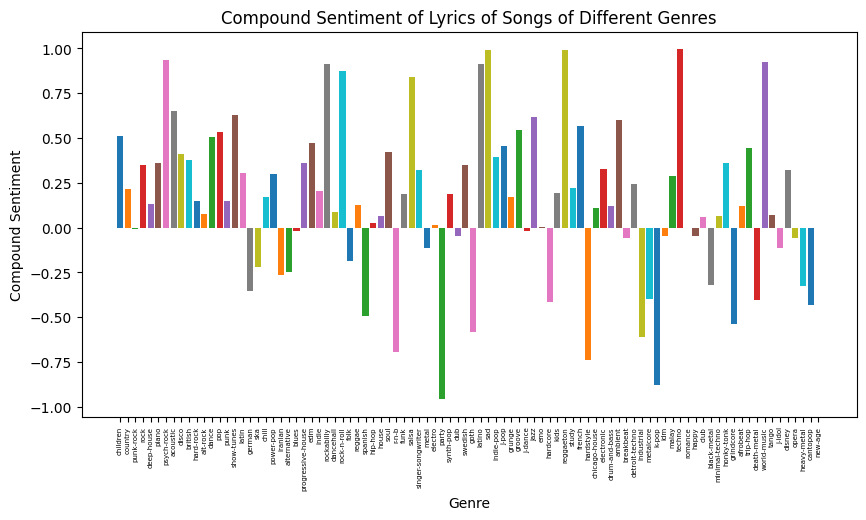

In [7]:
# We will compare the sentiment of the lyrics of the songs of the different genres using a bar graph

for genre in df['Genre'].unique():
    df2 = df[df['Genre'] == genre]
    plt.bar(genre, df2['compound'].mean())
    plt.xticks(rotation=90)
    plt.gcf().set_size_inches(10, 5)
    plt.xticks(fontsize=5)
    plt.xlabel('Genre')
    plt.ylabel('Compound Sentiment')
    plt.title('Compound Sentiment of Lyrics of Songs of Different Genres')


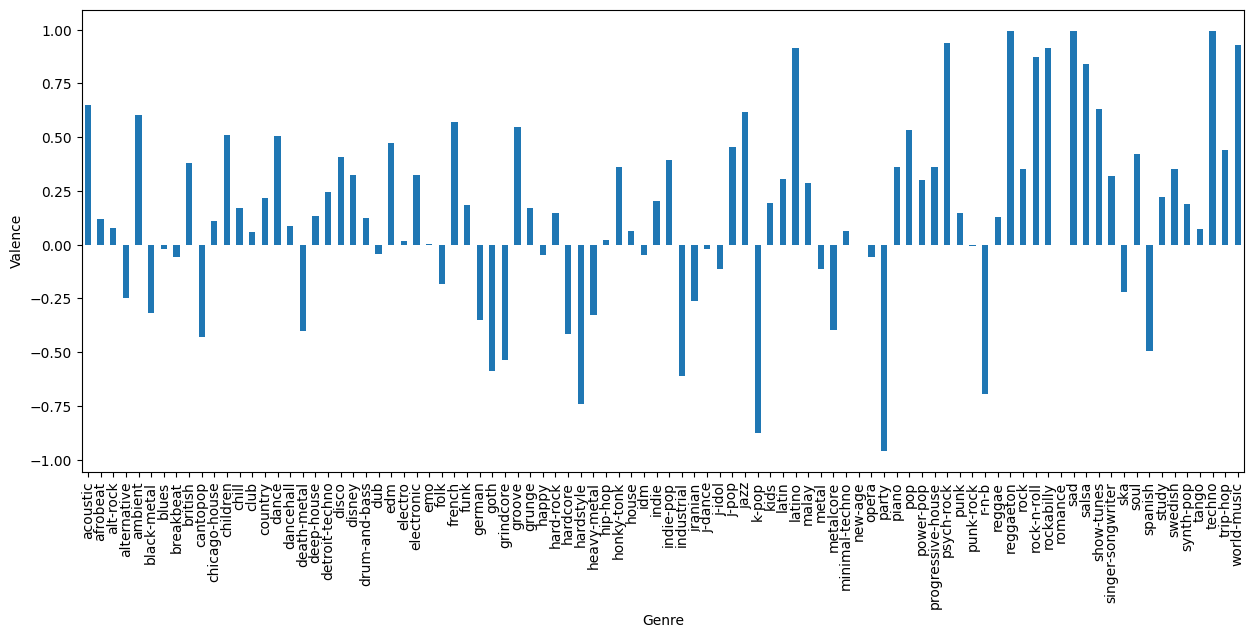

In [16]:
mean_scores_by_genre = df.groupby('Genre')['compound'].mean().reset_index()

# plot the mean scores for each genre
ax = mean_scores_by_genre.plot(x='Genre', y='compound', kind='bar', legend=False, figsize=(15, 6))
ax.set_xlabel('Genre')
ax.set_ylabel('Valence')

plt.show()